# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [36]:
for e in df.columns:
    title = str(e)
#     print(title)
    df = df.rename(columns={title : title.lower()})
#     print(title.lower())
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [37]:
df = df.set_index('linename')
df.head()


,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [38]:
df = df.reset_index()
df.head()
# set(df.station)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [39]:
test_df = df.loc[:, ['linename', 'station']]
# test_df

## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [40]:
# Your code here
stations_w_lines = sorted(set(zip(df.station, df.linename)))
stations_w_lines[:30], len(stations_w_lines)

([('1 AV', 'L'),
  ('103 ST', '1'),
  ('103 ST', '6'),
  ('103 ST', 'BC'),
  ('103 ST-CORONA', '7'),
  ('104 ST', 'A'),
  ('104 ST', 'JZ'),
  ('110 ST', '6'),
  ('111 ST', '7'),
  ('111 ST', 'A'),
  ('111 ST', 'J'),
  ('116 ST', '23'),
  ('116 ST', '6'),
  ('116 ST', 'BC'),
  ('116 ST-COLUMBIA', '1'),
  ('121 ST', 'JZ'),
  ('125 ST', '1'),
  ('125 ST', '23'),
  ('125 ST', '456'),
  ('125 ST', 'ACBD'),
  ('135 ST', '23'),
  ('135 ST', 'BC'),
  ('137 ST CITY COL', '1'),
  ('138/GRAND CONC', '45'),
  ('14 ST', '123FLM'),
  ('14 ST', 'ACEL'),
  ('14 ST', 'FLM123'),
  ('14 ST-UNION SQ', '456LNQRW'),
  ('14 ST-UNION SQ', 'LNQR456W'),
  ('145 ST', '1')],
 466)

In [41]:
type(stations_w_lines)

list

In [42]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df.loc[df['station']=='14 ST', ['station', 'linename', 'Num_Lines']].head()

,station,linename,Num_Lines
53458,14 ST,ACEL,4
53459,14 ST,ACEL,4
53460,14 ST,ACEL,4
53461,14 ST,ACEL,4
53462,14 ST,ACEL,4


In [43]:
df.sort_values(by = 'Num_Lines', ascending = False).head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


## Write a function to clean a column name.

In [44]:
def clean(col_name):
#     cleaned = #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    cleaned = col_name.title()
    return cleaned

In [45]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [46]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 12 columns):
Linename                                                                197625 non-null object
C/A                                                                     197625 non-null object
Unit                                                                    197625 non-null object
Scp                                                                     197625 non-null object
Station                                                                 197625 non-null object
Division                                                                197625 non-null object
Date                                                                    197625 non-null object
Time                                                                    197625 non-null object
Desc                                                                    197625 non-null object
Entries                           

## Compare subway traffic by day of the week. Display this as a graph.

In [48]:
#Your code here
df.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y')
df.Date.head()

0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: Date, dtype: datetime64[ns]

In [49]:
df.loc[:,'day_of_week'] = df.Date.dt.day_name()
df.day_of_week.unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [50]:
days = df.day_of_week
traffic = df.Entries

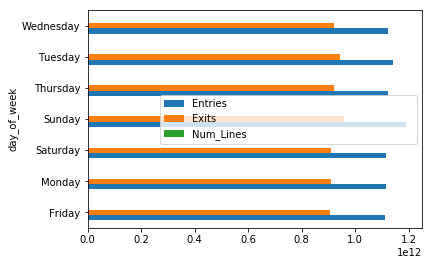

In [51]:
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [52]:
grouped

,Entries,Exits,Num_Lines
day_of_week,,,
Friday,1110224700078,906799065337,75573
Monday,1114237052454,911938153513,76110
Saturday,1115661545514,909142081474,74725
Sunday,1192306179082,959223750461,75306
Thursday,1122723988662,920691927110,76607
Tuesday,1143313287046,942230721477,77303
Wednesday,1123655222441,920630864687,75713


In [53]:
df.head()

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday


In [54]:
# grouped = grouped.reset_index()
grouped

,Entries,Exits,Num_Lines
day_of_week,,,
Friday,1110224700078,906799065337,75573
Monday,1114237052454,911938153513,76110
Saturday,1115661545514,909142081474,74725
Sunday,1192306179082,959223750461,75306
Thursday,1122723988662,920691927110,76607
Tuesday,1143313287046,942230721477,77303
Wednesday,1123655222441,920630864687,75713


In [56]:
df.loc[:,'num_day_of_week'] = df.Date.dt.dayofweek
df.head()

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,day_of_week,num_day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday,5
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday,5
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday,5
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday,5
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday,5


In [73]:
binary = df.groupby('num_day_of_week').sum()
binary

,Entries,Exits,Num_Lines
num_day_of_week,,,
0,1114237052454,911938153513,76110
1,1143313287046,942230721477,77303
2,1123655222441,920630864687,75713
3,1122723988662,920691927110,76607
4,1110224700078,906799065337,75573
5,1115661545514,909142081474,74725
6,1192306179082,959223750461,75306


In [74]:
binary = binary.reset_index()
binary

,num_day_of_week,Entries,Exits,Num_Lines
0,0,1114237052454,911938153513,76110
1,1,1143313287046,942230721477,77303
2,2,1123655222441,920630864687,75713
3,3,1122723988662,920691927110,76607
4,4,1110224700078,906799065337,75573
5,5,1115661545514,909142081474,74725
6,6,1192306179082,959223750461,75306


In [75]:
binary.loc[binary.num_day_of_week >4,'weekend'] = 'On The Weekend'
binary.loc[binary.num_day_of_week <=4, 'weekend'] = 'During The Week'
binary

,num_day_of_week,Entries,Exits,Num_Lines,weekend
0,0,1114237052454,911938153513,76110,During The Week
1,1,1143313287046,942230721477,77303,During The Week
2,2,1123655222441,920630864687,75713,During The Week
3,3,1122723988662,920691927110,76607,During The Week
4,4,1110224700078,906799065337,75573,During The Week
5,5,1115661545514,909142081474,74725,On The Weekend
6,6,1192306179082,959223750461,75306,On The Weekend


In [76]:
binary = binary.groupby('weekend').mean()
binary

,num_day_of_week,Entries,Exits,Num_Lines
weekend,,,,
During The Week,2.0,1.122831e+12,9.204581e+11,76261.2
On The Weekend,5.5,1.153984e+12,9.341829e+11,75015.5


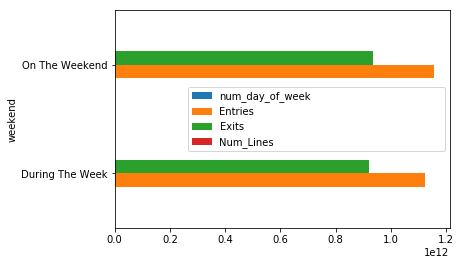

In [77]:
binary.plot(kind = 'barh')

# Drop a couple of columns

In [79]:
df.head()

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,day_of_week,num_day_of_week
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday,5
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday,5
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday,5
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday,5
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday,5


In [81]:
df = df.drop(['C/A', 'Scp'], axis = 1)
df.head()

,Linename,Unit,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,day_of_week,num_day_of_week
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday,5
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday,5
2,NQR456W,R051,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,Saturday,5
3,NQR456W,R051,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,Saturday,5
4,NQR456W,R051,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,Saturday,5
